In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('nba_games_stats.csv')

In [3]:
gdf.columns

Index(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'],
      dtype='object')

In [4]:
gswdf = gdf[gdf.Team == 'GSW']
cldf = gdf[gdf.Team == 'CLE']


In [5]:
gswdf.Date = gswdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
gswdf = gswdf[gswdf['Date'] > pd.to_datetime('20171001', format='%Y%m%d', errors='ignore')]

cldf.Date = cldf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
cldf = cldf[cldf['Date'] > pd.to_datetime('20171001', format='%Y%m%d', errors='ignore')]

C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


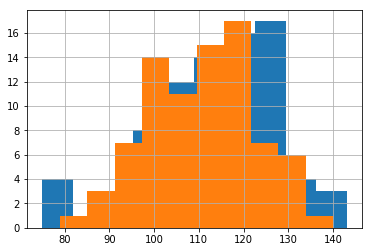

In [6]:
gswdf.TeamPoints.hist()
cldf.TeamPoints.hist()

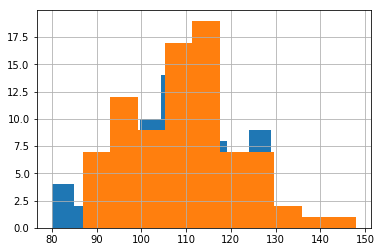

In [7]:
gswdf.OpponentPoints.hist()
cldf.OpponentPoints.hist()

In [8]:
gswmeanpts = gswdf.TeamPoints.mean()
clmeanpts = cldf.TeamPoints.mean()
gswsdpts = gswdf.TeamPoints.std()
clsdpts = cldf.TeamPoints.std()

gswmeanopp = gswdf.OpponentPoints.mean()
clmeanopp = cldf.OpponentPoints.mean()
gswsdopp = gswdf.OpponentPoints.std()
clsdopp = cldf.OpponentPoints.std()

print("Golden State Points Mean ", gswmeanpts)
print("Golden State Points SD ", gswsdpts)
print("Cleveland Points Mean ", clmeanpts)
print("Cleveland Points SD ", clsdpts)

print("Golden State OppPoints Mean ", gswmeanopp)
print("Golden State OppPoints SD ", gswsdopp)
print("Cleveland OppPoints Mean ", clmeanopp)
print("Cleveland OppPoints SD ", clsdopp)

Golden State Points Mean  113.46341463414635
Golden State Points SD  14.121339356922327
Cleveland Points Mean  110.85365853658537
Cleveland Points SD  12.02068377014038
Golden State OppPoints Mean  107.48780487804878
Golden State OppPoints SD  11.858469809931732
Cleveland OppPoints Mean  109.92682926829268
Cleveland OppPoints SD  12.052130069205973


In [9]:
def gameSim():
    GSWScore = (rnd.gauss(gswmeanpts,gswsdpts)+ rnd.gauss(clmeanopp,clsdopp))/2
    CLScore = (rnd.gauss(clmeanpts,clsdpts)+ rnd.gauss(gswmeanopp,gswsdopp))/2
    if int(round(GSWScore)) > int(round(CLScore)):
        return 1
    elif int(round(GSWScore)) < int(round(CLScore)):
        return -1
    else: return 0

In [10]:
def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('GSW Win ', team1win/(team1win+team2win+tie)*100,'%')
    print('CLE Win ', team2win/(team1win+team2win+tie)*100,'%')
    print('Tie ', tie/(team1win+team2win+tie)*100, '%')
    return gamesout
        

In [12]:
gamesSim(10000
        )

GSW Win  56.57 %
CLE Win  40.25 %
Tie  3.18 %


[1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,